Loading metadata.csv...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13288\333737730.py:7: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('metadata.csv')



First 5 rows:
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  1

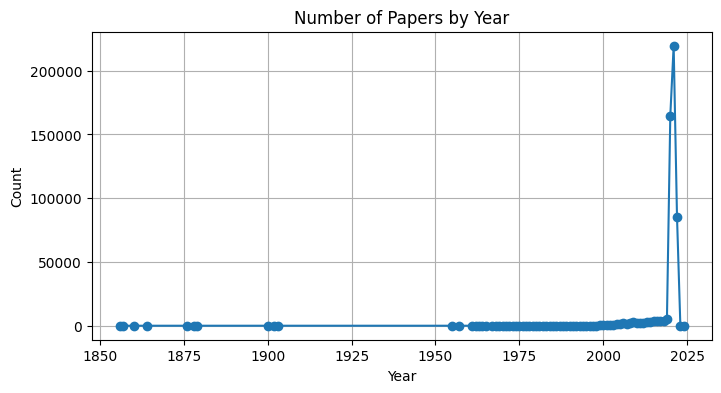

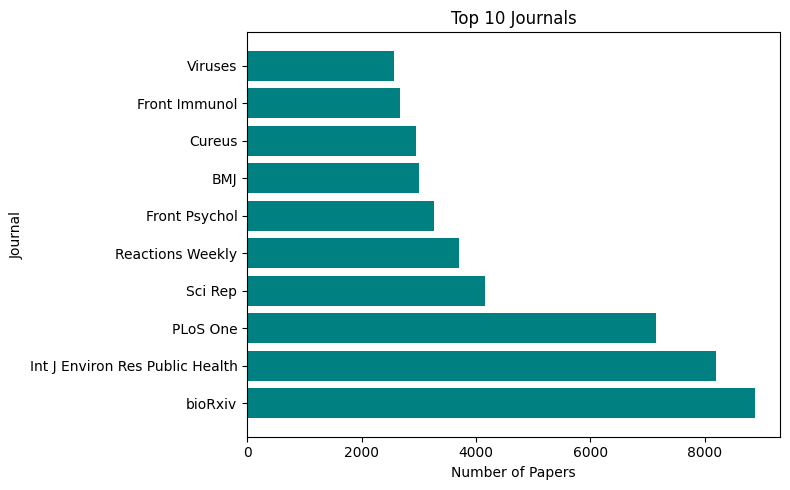


Top 10 Words in Titles (simplified):
covid-19: 142549
during: 47787
patients: 39721
sars-cov-2: 39124
from: 36295
pandemic: 36054
study: 36029
health: 29964
disease: 22499
coronavirus: 20414


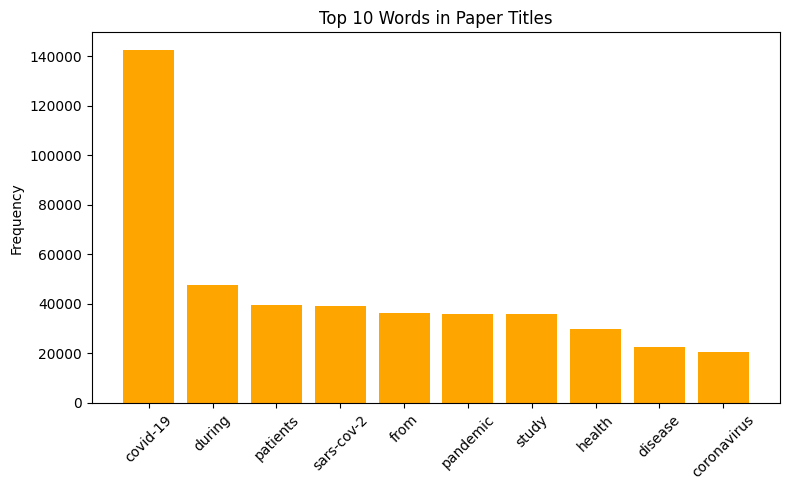

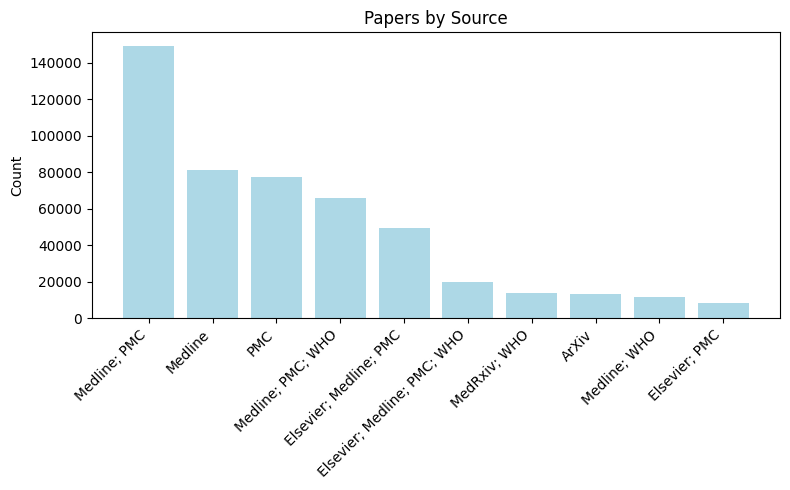

2025-09-22 07:13:57.833 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-22 07:13:58.318 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-09-22 07:13:58.501 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 07:14:08.029 
  command:

    streamlit run c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-22 07:14:08.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 07:14:08.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 07:14:08.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 07:14:10.3

DeltaGenerator()

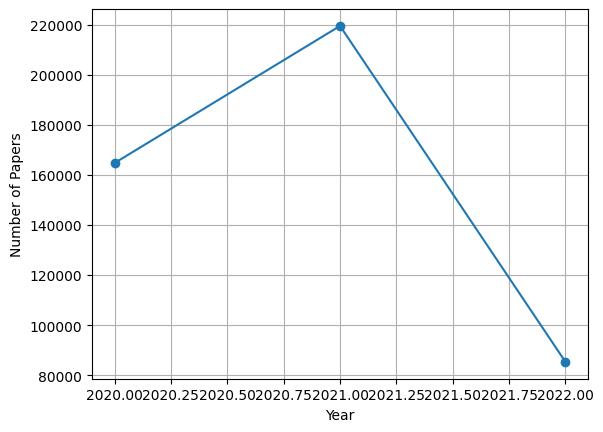

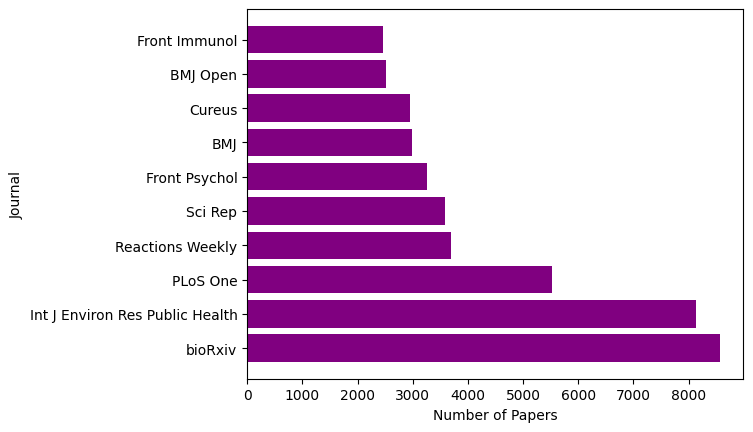

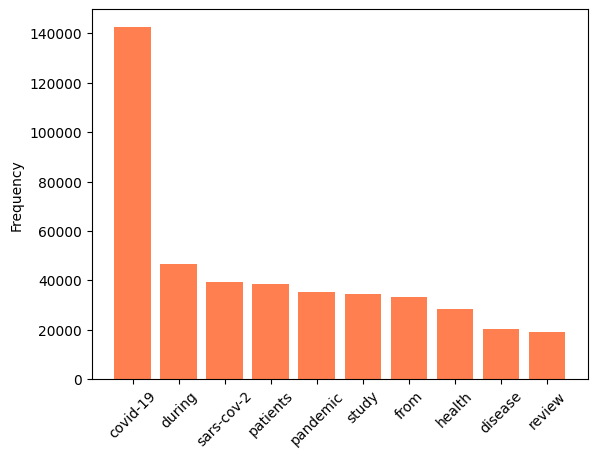

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
# PART 1:
# Load the data
print("Loading metadata.csv...")
df = pd.read_csv('metadata.csv')

# Show first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Show shape
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Show column types
print("\nColumn data types:")
print(df.dtypes)

# Check missing values in key columns
key_cols = ['title', 'abstract', 'publish_time', 'journal']
print("\nMissing values in key columns:")
print(df[key_cols].isnull().sum())

# Show stats for numeric columns
print("\nBasic stats for numeric columns:")
print(df.describe())

# PART 2: DATA CLEANING

# Drop columns with too many missing values (if any column is >70% empty)
missing_pct = df.isnull().mean()
cols_to_drop = missing_pct[missing_pct > 0.7].index
df_clean = df.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with >70% missing data.")

# Fill missing abstracts with empty string
df_clean['abstract'] = df_clean['abstract'].fillna('')

# Convert publish_time to datetime
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['publish_year'] = df_clean['publish_time'].dt.year

# Remove rows where year is missing
df_clean = df_clean.dropna(subset=['publish_year'])
df_clean['publish_year'] = df_clean['publish_year'].astype(int)

# Simple word count for abstract: split by space and count parts
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

print(f"Cleaned dataset now has {df_clean.shape[0]} rows.")

# 1. Count papers by year
papers_by_year = df_clean['publish_year'].value_counts().sort_index()

# Plot publications over time
plt.figure(figsize=(8, 4))
plt.plot(papers_by_year.index, papers_by_year.values, marker='o')
plt.title('Number of Papers by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('papers_over_time.png')
plt.show()

# 2. Top 10 journals
top_journals = df_clean['journal'].value_counts().head(10)

# Plot top journals
plt.figure(figsize=(8, 5))
plt.barh(top_journals.index, top_journals.values, color='teal')
plt.title('Top 10 Journals')
plt.xlabel('Number of Papers')
plt.ylabel('Journal')
plt.tight_layout()
plt.savefig('top_journals.png')
plt.show()

# PART 3: DATA ANALYSIS AND VISUALIZATIONS

# Get all titles, lowercase, split, and count manually
all_words = []
for title in df_clean['title'].dropna():
    words = str(title).lower().split()
    # Remove very short words and common tiny words
    words = [w for w in words if len(w) > 2 and w not in ['the', 'and', 'for', 'with', 'are', 'was']]
    all_words.extend(words)

# Manually count top 10 words
word_count = {}
for word in all_words:
    word_count[word] = word_count.get(word, 0) + 1

# Sort and get top 10
sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Words in Titles (simplified):")
for word, count in sorted_words:
    print(f"{word}: {count}")

# Plot top words
words, counts = zip(*sorted_words) if sorted_words else ([], [])
plt.figure(figsize=(8, 5))
plt.bar(words, counts, color='orange')
plt.title('Top 10 Words in Paper Titles')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('top_words.png')
plt.show()

# 4. Optional: Paper count by source (if column exists)
if 'source_x' in df_clean.columns:
    source_counts = df_clean['source_x'].value_counts().head(10)
    plt.figure(figsize=(8, 5))
    plt.bar(source_counts.index, source_counts.values, color='lightblue')
    plt.title('Papers by Source')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig('source_distribution.png')
    plt.show()
else:
    print("No 'source_x' column found — skipping source plot.")

# PART4: TREAMLIT APP

# Load and clean data (minimal version)
@st.cache_data
def load_data():
    df = pd.read_csv('metadata.csv')
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    df['publish_year'] = df['publish_time'].dt.year
    df = df.dropna(subset=['publish_year'])
    df['publish_year'] = df['publish_year'].astype(int)
    df['abstract'] = df['abstract'].fillna('')
    df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
    return df

df = load_data()

# App UI
st.title("CORD-19 Simple Explorer")
st.write("Explore COVID-19 research papers by year.")

# Year filter
min_year = int(df['publish_year'].min())
max_year = int(df['publish_year'].max())
year_range = st.slider("Select Year Range", min_year, max_year, (2020, 2022))

# Filter data
df_filtered = df[(df['publish_year'] >= year_range[0]) & (df['publish_year'] <= year_range[1])]

# Show sample data
st.subheader("Sample Papers")
st.dataframe(df_filtered[['title', 'journal', 'publish_year']].head(5))

# Plot 1: Papers over time
st.subheader("Papers Published Over Time")
papers_by_year = df_filtered['publish_year'].value_counts().sort_index()
fig, ax = plt.subplots()
ax.plot(papers_by_year.index, papers_by_year.values, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Papers')
ax.grid(True)
st.pyplot(fig)

# Plot 2: Top Journals
st.subheader("Top Journals")
top_journals = df_filtered['journal'].value_counts().head(10)
fig2, ax2 = plt.subplots()
ax2.barh(top_journals.index, top_journals.values, color='purple')
ax2.set_xlabel('Number of Papers')
ax2.set_ylabel('Journal')
st.pyplot(fig2)

# Plot 3: Top Words in Titles 
st.subheader("Top Words in Titles")

all_words = []
for title in df_filtered['title'].dropna():
    words = str(title).lower().split()
    words = [w for w in words if len(w) > 2 and w not in ['the', 'and', 'for', 'with', 'are', 'was']]
    all_words.extend(words)

word_count = {}
for word in all_words:
    word_count[word] = word_count.get(word, 0) + 1

sorted_words = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:10]
if sorted_words:
    words, counts = zip(*sorted_words)
    fig3, ax3 = plt.subplots()
    ax3.bar(words, counts, color='coral')
    ax3.set_ylabel('Frequency')
    plt.xticks(rotation=45)
    st.pyplot(fig3)
else:
    st.write("No title words to display.")

# Footer
st.write("---")
st.caption("Built with Streamlit and pandas | CORD-19 Dataset")